In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [19]:
#linear_model.Ridge

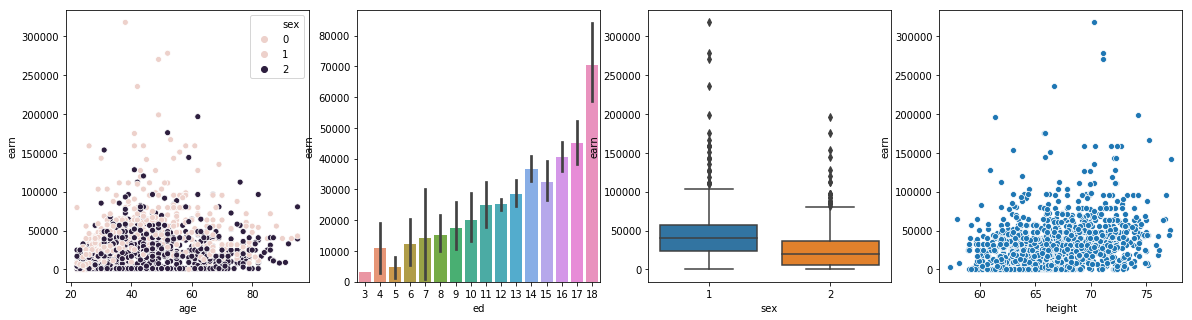

In [11]:
df = pd.read_csv("wages.csv")
df.dropna()
df.describe()
df.columns
fig, axs = plt.subplots(ncols=4, figsize = (20, 5))
sns.scatterplot(data = df, x = 'age', y = 'earn', hue = 'sex', ax=axs[0])
sns.barplot(data = df, x = 'ed', y = 'earn', ax=axs[1])
sns.boxplot(data = df, x ='sex', y = 'earn', ax=axs[2])
sns.scatterplot(data = df, x ='height', y = 'earn', ax=axs[3])
plt.show()

In [12]:
# extracting explanatory and response variables
X = df[['age', 'ed', 'sex', 'height']].values.reshape(-1, 4)
y = df['earn'].values.reshape(-1,1)
# Split the targets into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Create linear regression with L2/L1 penalty term
regr = linear_model.Ridge(alpha = 0.5)
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

Coefficients: 
 [[   274.47124104   4345.97598357 -17391.35189251    588.1258881 ]]
Mean squared error: 668159085.51


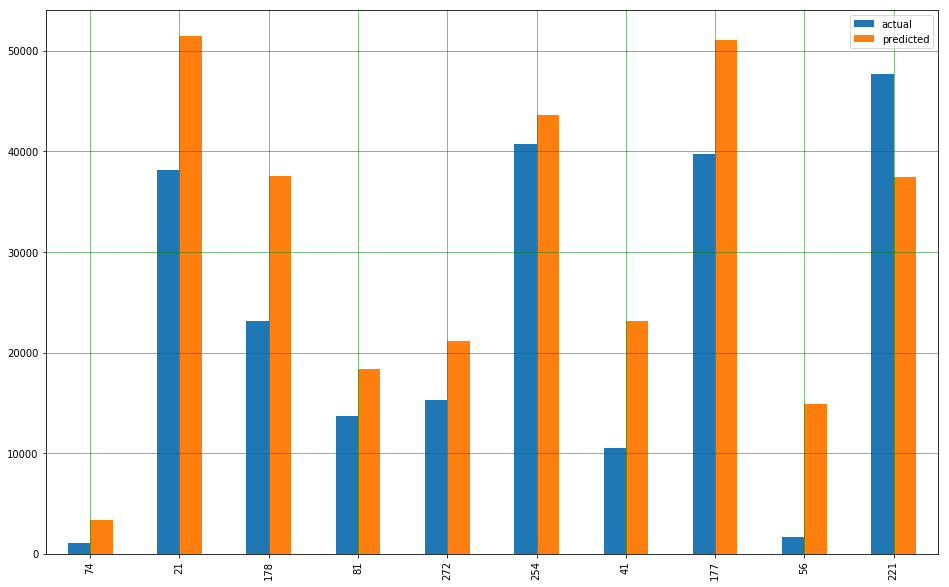

In [16]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
d = {"actual":y_test.ravel(), "predicted":y_pred.ravel()}
df1 = pd.DataFrame(d).sample(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [17]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17599.95450277785
Mean Squared Error: 668159085.5089082
Root Mean Squared Error: 25848.77338499659
